In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from emissions.trainer import Trainer
from emissions.data import load_data, clean_data
from sklearn.metrics import plot_confusion_matrix

In [7]:
pollution_quantity = {}

# 2019 - Baseline model

In [8]:
from emissions.impsearch import ImpSearch
imp = ImpSearch()
imp.load_data()

----------------start loading data----------------
Data loaded: 187503 records
----------------start cleaning data----------------

Records in input data: 187503

Share of Pass and Fail before cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10813
Unique vehicles in Pass: 84908

Records with missing GVWR: 8125

Records after droping rows where GVWR is < 1000 or missing: 179373

Records after keeping only the earliest test within a month for each vehicle: 165732

Records where AFTER_COVID is True: 21325

Records where ODOMETER = 0: 796

Records after droping rows where ODOMETER is missing: 164855

Records after droping rows where MILE_YEAR > 40,000: 163891

Records in output data:163891

Share of Pass and Fail after cleaning:
Fail: 7%
Pass: 93%

Unique vehicles in Fail: 10194
Unique vehicles in Pass: 78573
['VEHICLE_TYPE' 'MODEL_YEAR' 'VEHICLE_AGE' 'MILE_YEAR' 'GVWR'
 'ENGINE_SIZE' 'TRANS_TYPE' 'TEST_TYPE' 'RESULT' 'MAKE'
 'ENGINE_WEIGHT_RATIO' 'SPORT' 'TEST_SDATE' 'AFTER_COVID']


In [9]:
imp.cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE']
imp.cols

['VEHICLE_AGE', 'MILE_YEAR', 'MAKE']


max_depth: 5
           train    val   test
accuracy   0.570  0.571  0.814
recall     0.725  0.708  0.313
precision  0.114  0.112  0.133

By the time 2019-02-28, 
                    - 250 vehicles were off the road in reality
                    - 479 vehicles could have been off the road using model max_depth = 5

By the time 2019-07-01, 
                    - 833 vehicles were off the road in reality
                    - 937 vehicles could have been off the road using model max_depth = 5

max_depth: 6
           train    val   test
accuracy   0.598  0.600  0.758
recall     0.682  0.667  0.370
precision  0.117  0.115  0.112

By the time 2019-03-18, 
                    - 361 vehicles were off the road in reality
                    - 566 vehicles could have been off the road using model max_depth = 6

By the time 2019-07-01, 
                    - 833 vehicles were off the road in reality
                    - 941 vehicles could have been off the road using model max_depth = 6

max

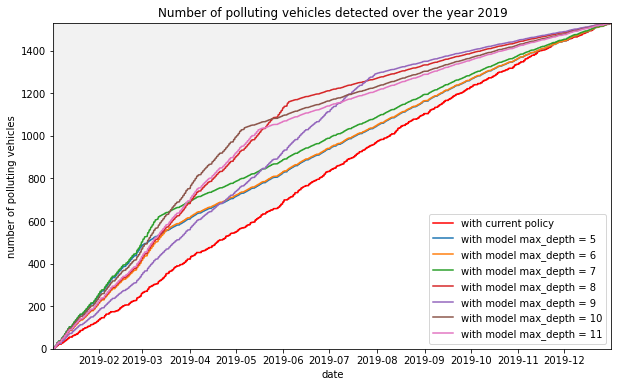

10    11799931.5
8     11892247.5
11    12357772.5
9     13183545.0
7     13732733.0
5     14569567.5
6     14694703.5
dtype: float64

Saved implementation_analysis_2019_best_depth_10.csv in data folder


In [10]:
imp.implement(2019, max_depth=np.arange(5, 12))

In [22]:
pollution_quantity['2019_baseline'] = [10, 11799931.5]

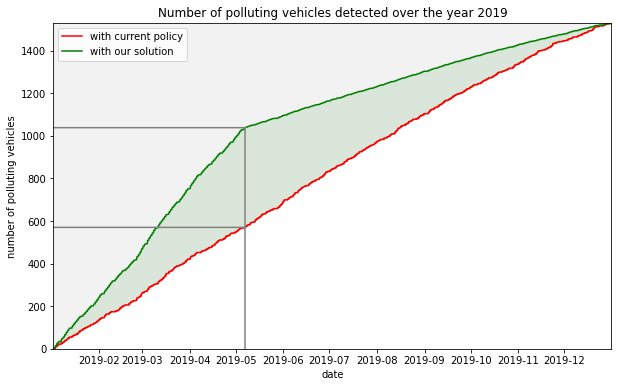

In [12]:
imp.plot_clean()

# 2019 - Decision Tree


In [13]:
imp.cols = ['VEHICLE_AGE', 'MILE_YEAR', 'MAKE', 'MODEL_YEAR', 'ENGINE_WEIGHT_RATIO']


max_depth: 5
           train    val   test
accuracy   0.594  0.587  0.698
recall     0.750  0.753  0.630
precision  0.122  0.123  0.134

By the time 2019-04-19, 
                    - 508 vehicles were off the road in reality
                    - 965 vehicles could have been off the road using model max_depth = 5

By the time 2019-07-01, 
                    - 833 vehicles were off the road in reality
                    - 1136 vehicles could have been off the road using model max_depth = 5

max_depth: 6
           train    val   test
accuracy   0.609  0.613  0.609
recall     0.720  0.704  0.737
precision  0.123  0.123  0.119

By the time 2019-05-28, 
                    - 662 vehicles were off the road in reality
                    - 1128 vehicles could have been off the road using model max_depth = 6

By the time 2019-07-01, 
                    - 833 vehicles were off the road in reality
                    - 1200 vehicles could have been off the road using model max_depth = 6



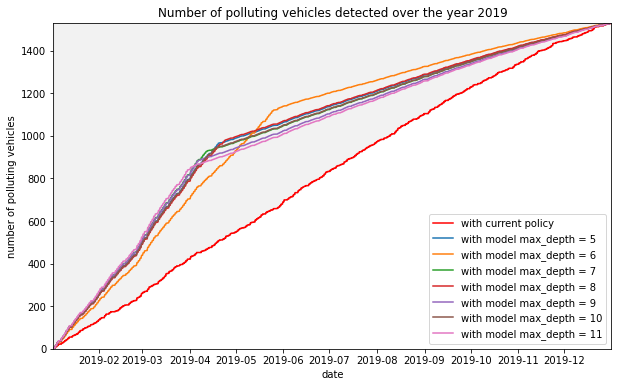

6     11797980.5
8     11844095.5
5     11855133.0
7     11920118.0
10    11992770.5
9     12170117.5
11    12237148.5
dtype: float64

Saved implementation_analysis_2019_best_depth_6.csv in data folder


In [14]:
imp.implement(2019, max_depth=np.arange(5, 12))

In [23]:
pollution_quantity['2019_DT'] = [6, 11797980.5]

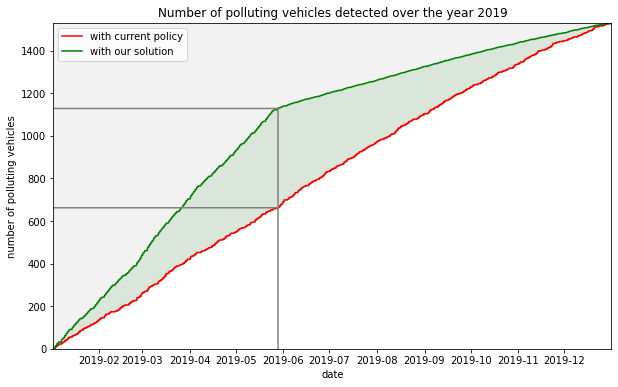

In [16]:
imp.plot_clean()

# 2019 - Random Forest


max_depth: 6
           train    val   test
accuracy   0.615  0.614  0.702
recall     0.757  0.746  0.649
precision  0.129  0.129  0.139

By the time 2019-04-19, 
                    - 505 vehicles were off the road in reality
                    - 994 vehicles could have been off the road using model max_depth = 6

By the time 2019-07-01, 
                    - 833 vehicles were off the road in reality
                    - 1157 vehicles could have been off the road using model max_depth = 6

max_depth: 7
           train    val   test
accuracy   0.628  0.626  0.717
recall     0.755  0.739  0.630
precision  0.133  0.131  0.143

By the time 2019-04-12, 
                    - 470 vehicles were off the road in reality
                    - 965 vehicles could have been off the road using model max_depth = 7

By the time 2019-07-01, 
                    - 833 vehicles were off the road in reality
                    - 1147 vehicles could have been off the road using model max_depth = 7

m

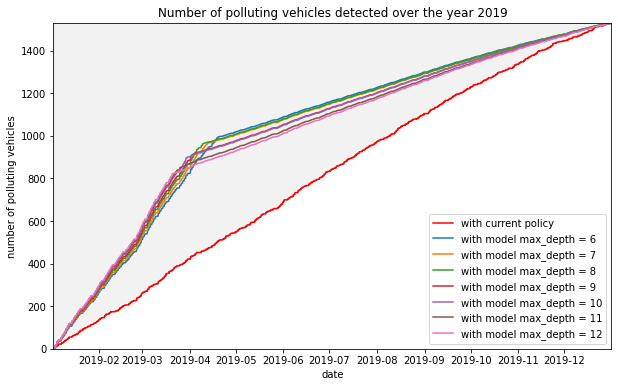

8     11411407.5
6     11504909.0
7     11528264.5
10    11596702.0
9     11635686.5
11    11860007.5
12    11970880.5
dtype: float64

Saved implementation_analysis_2019_best_depth_8.csv in data folder
CPU times: user 2min 30s, sys: 363 ms, total: 2min 30s
Wall time: 12min 3s


In [17]:
%%time
imp.implement(2019, n_estimators=[50], max_depth=np.arange(6, 13, 1))

In [24]:
pollution_quantity['2019_RF'] = [8, 11411407.5]

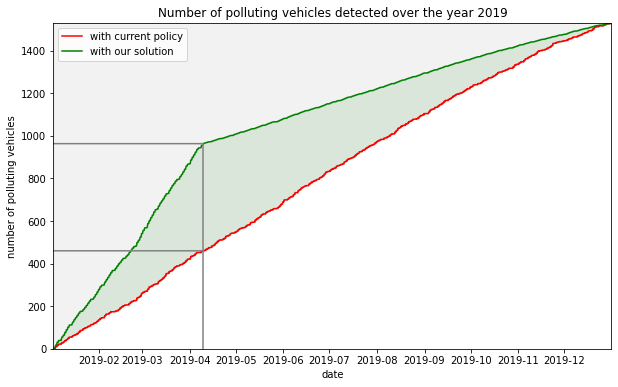

In [25]:
imp.plot_clean()

# Summary

In [26]:
t = pd.read_csv('../data/implementation_analysis_2019_best_depth_8.csv').sort_values('TEST_SDATE')
t.set_index('TEST_SDATE', inplace=True)
t['n_fails_left'] = t.n_fails.max() - t.n_fails
pollution_quantity['current_policy'] = ['-', t.n_fails_left.sum()]

In [27]:
tmp = pd.DataFrame.from_dict(pollution_quantity, orient='index')
tmp.columns = ['max_depth', 'pollution_quantity']
tmp['pollution_reduction'] = tmp.loc['current_policy', 'pollution_quantity'] - tmp.pollution_quantity
tmp.sort_values('pollution_reduction', ascending=False)

,max_depth,pollution_quantity,pollution_reduction
2019_RF,8,11411407.5,5412779.5
2019_DT,6,11797980.5,5026206.5
2019_baseline,10,11799931.5,5024255.5
current_policy,-,16824187.0,0.0
